In [11]:
import pandas as pd
import numpy as np
import os

In [16]:
%run sqlite_execution.py
db_handler = Sqlite_Handler()
# db_handler.drop_duplicates()
info = db_handler.get_info()
info

,total,solved,unsolved
bonsai tree,1235,642,593
flower,1670,500,1170
tree,2007,474,1533
cup of orange juice,1695,418,1277
car,1493,359,1134
motorcycle,1335,309,1026
laptop,1120,303,817
violin,267,252,15
helicopter,242,242,0
goose,208,208,0


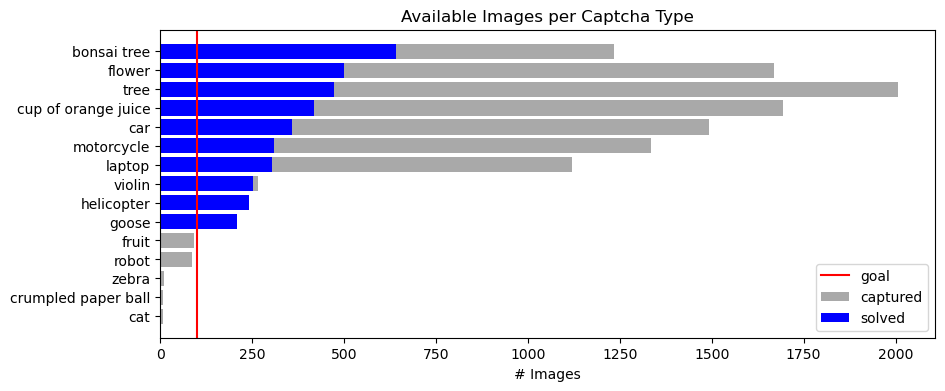

In [17]:
%run visualizer.py
plot_captcha_info(info, figsize=(4,10))

In [9]:
%run collector/collector.py
urls = [
    "https://accounts.hcaptcha.com/demo",
    "https://nopecha.com/demo/hcaptcha",
    "https://democaptcha.com/demo-form-eng/hcaptcha.html",
    "https://freebitco.in/signup/?op=s", 
    "https://accounts.shopify.com/signup?rid=f8d4b2e6-f0fe-41ab-83e5-e633974bd42b&signup_strategy=password",
    "https://www.dierenkliniekoudorp.nl/",
    "https://cellar335.com/",
    "https://www.salumificiovecchi.it/",
    "https://economygarages.com/",
    "https://www.assimilationdesigns.com/"
    "https://raleighvehiclewraps.com/"
    ]
collect_data(db_handler, urls[0], count=100, collect_v2=True, limit=2000)

Loaded Website
Launched hCaptcha
Switched to Captcha
Captcha V1
cup of orange juice: Added 9 rows to db
cup of orange juice: Saved 9 images to disk
Captcha V2
Saved screenshot to ../data/images/v2/parrot/13-13-45-23-950262.png
Captcha V1
tree            : Captcha string is limited, skipping
Captcha V1
cup of orange juice: Added 9 rows to db
Captcha V1
cup of orange juice: Saved 9 images to disk
ERROR: Message: stale element reference: stale element not found
  (Session info: chrome=115.0.5790.171); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00B3A813+48355]
	(No symbol) [0x00ACC4B1]
	(No symbol) [0x009D5358]
	(No symbol) [0x009D87A1]
	(No symbol) [0x009DA19B]
	(No symbol) [0x00A2D279]
	(No symbol) [0x00A1A73C]
	(No symbol) [0x00A2C922]
	(No symbol) [0x00A1A536]
	(No symbol) [0x009F82DC]
	(No symbol) [0x009F93DD]
	GetHandleVerifier [0x

In [10]:
assert 1 == 0 # to avoid execution of code below

AssertionError: 

In [21]:
%run pytorch_training.py
train_model_on_captcha_string(db_handler, "goose", save=True)
# train_models_on_all_captcha_strings(db_handler, threshold=100, save=True)

Training model on goose...


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (208,) + inhomogeneous part.

Testing 23-225_02 on bonsai tree...
Correct: 630/642, Accuracy: 98.13%
Testing 23-224_02 on car...
Correct: 348/359, Accuracy: 96.94%
Testing 23-225_01 on flower...
Correct: 484/500, Accuracy: 96.80%
Testing 23-224_01 on helicopter...
Correct: 233/242, Accuracy: 96.28%
Testing 23-224_01 on laptop...
Correct: 296/303, Accuracy: 97.69%
Testing 23-224_01 on motorcycle...
Correct: 304/309, Accuracy: 98.38%
Testing 23-225_01 on tree...
Correct: 466/474, Accuracy: 98.31%


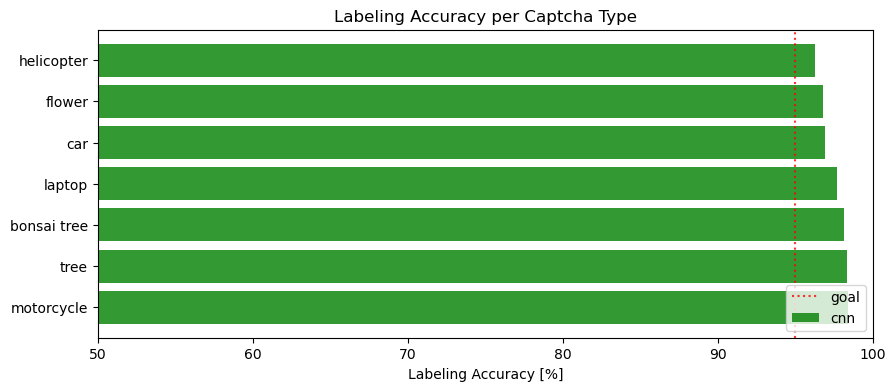

In [19]:
%run pytorch_training.py
model_accuracy = test_models_on_all_captcha_strings(db_handler)

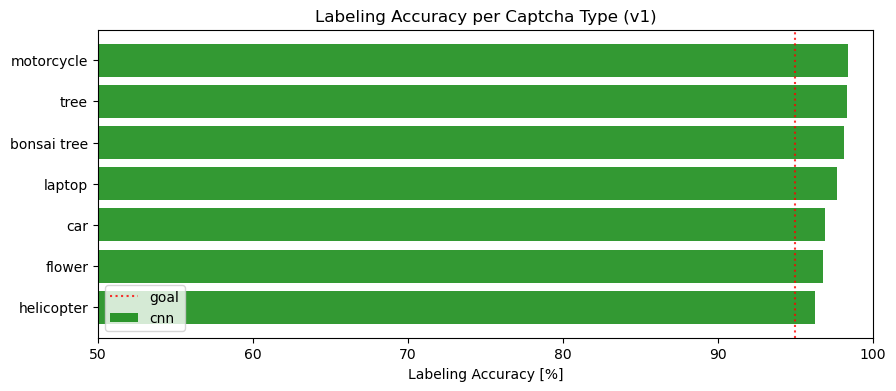

In [20]:
%run visualizer.py
plot_model_accuracy(model_accuracy, figsize=(4,10))

In [14]:
%run manual_classifier.py
mc = Manual_Classifier(db_handler)

Setting images for tree
Setting images for goose
Setting images for cup of orange juice
labeled cup of orange juice/13-00-59-32-527793_6.png as False
labeled cup of orange juice/13-12-25-35-667771_8.png as False
labeled cup of orange juice/13-13-17-31-173987_5.png as True
labeled cup of orange juice/13-13-32-42-841214_5.png as False
labeled cup of orange juice/13-13-36-47-175373_6.png as False
labeled cup of orange juice/13-13-46-30-956094_2.png as True
labeled cup of orange juice/13-13-53-13-464698_2.png as True
labeled cup of orange juice/13-13-59-35-905347_4.png as False
labeled cup of orange juice/13-14-06-01-924692_1.png as True
Setting images for cup of orange juice
labeled cup of orange juice/13-01-40-36-458852_0.png as True
labeled cup of orange juice/13-01-40-55-760547_4.png as False
labeled cup of orange juice/13-13-31-56-264367_3.png as True
labeled cup of orange juice/13-13-33-14-282096_7.png as True
labeled cup of orange juice/13-13-35-14-643319_5.png as False
labeled cup 

C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-59-24-785717_1.png as True
labeled cup of orange juice/13-12-59-24-785717_6.png as True
labeled cup of orange juice/13-13-02-18-553625_1.png as True
labeled cup of orange juice/13-13-37-24-529895_2.png as False
labeled cup of orange juice/13-13-39-43-913005_5.png as False
labeled cup of orange juice/13-13-42-25-013484_3.png as False
labeled cup of orange juice/13-13-55-41-855895_0.png as False
labeled cup of orange juice/13-13-59-35-905347_8.png as True
labeled cup of orange juice/13-14-01-33-003195_6.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-13-04-03-162800_6.png as False
labeled cup of orange juice/13-13-10-09-453552_8.png as False
labeled cup of orange juice/13-13-42-15-366083_1.png as True
labeled cup of orange juice/13-13-47-42-944785_4.png as False
labeled cup of orange juice/13-13-51-00-144945_2.png as False
labeled cup of orange juice/13-13-54-21-267000_5.png as True
labeled cup of orange juice/13-13-54-45-011907_7.png as False
labeled cup of orange juice/13-13-57-49-513561_7.png as True
labeled cup of orange juice/13-13-59-05-102792_2.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-26-52-409692_4.png as False
labeled cup of orange juice/13-12-58-09-294501_7.png as True
labeled cup of orange juice/13-13-07-55-014054_2.png as False
labeled cup of orange juice/13-13-11-31-683473_3.png as False
labeled cup of orange juice/13-13-24-27-224233_6.png as False
labeled cup of orange juice/13-13-40-19-119818_6.png as False
labeled cup of orange juice/13-13-40-47-126401_8.png as True
labeled cup of orange juice/13-13-42-25-013484_7.png as False
labeled cup of orange juice/13-13-49-14-175900_1.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-58-54-104018_5.png as False
labeled cup of orange juice/13-13-17-45-232802_3.png as False
labeled cup of orange juice/13-13-18-27-329967_7.png as True
labeled cup of orange juice/13-13-36-14-619515_0.png as False
labeled cup of orange juice/13-13-48-00-487583_3.png as True
labeled cup of orange juice/13-13-51-19-949833_0.png as True
labeled cup of orange juice/13-13-54-45-011907_8.png as True
labeled cup of orange juice/13-14-01-01-519785_7.png as True
labeled cup of orange juice/13-14-05-00-843740_7.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-25-35-667771_1.png as False
labeled cup of orange juice/13-13-09-27-885614_6.png as False
labeled cup of orange juice/13-13-25-32-479329_7.png as False
labeled cup of orange juice/13-13-34-29-898181_1.png as True
labeled cup of orange juice/13-13-36-44-638780_1.png as False
labeled cup of orange juice/13-13-42-25-013484_2.png as True
labeled cup of orange juice/13-13-45-22-868122_1.png as False
labeled cup of orange juice/13-13-54-56-739958_1.png as False
labeled cup of orange juice/13-14-01-38-203268_7.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-13-16-48-286183_2.png as False
labeled cup of orange juice/13-13-24-03-712917_7.png as False
labeled cup of orange juice/13-13-35-09-330015_2.png as True
labeled cup of orange juice/13-13-49-43-353104_4.png as False
labeled cup of orange juice/13-13-51-05-751911_0.png as False
labeled cup of orange juice/13-13-51-09-712704_4.png as False
labeled cup of orange juice/13-13-53-57-947682_0.png as False
labeled cup of orange juice/13-13-54-23-825326_3.png as False
labeled cup of orange juice/13-13-59-05-102792_5.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-40-33-523474_4.png as True
labeled cup of orange juice/13-13-03-01-469332_4.png as True
labeled cup of orange juice/13-13-15-36-538813_0.png as True
labeled cup of orange juice/13-13-25-44-368209_8.png as False
labeled cup of orange juice/13-13-40-39-167335_4.png as False
labeled cup of orange juice/13-13-49-34-309040_3.png as False
labeled cup of orange juice/13-13-53-13-464698_6.png as False
labeled cup of orange juice/13-13-56-34-023385_2.png as False
labeled cup of orange juice/13-13-59-23-692066_2.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-27-25-461415_1.png as True
labeled cup of orange juice/13-12-27-25-461415_4.png as True
labeled cup of orange juice/13-12-27-38-840733_2.png as False
labeled cup of orange juice/13-13-33-25-505903_6.png as False
labeled cup of orange juice/13-13-34-38-315627_2.png as True
labeled cup of orange juice/13-13-54-21-267000_7.png as False
labeled cup of orange juice/13-13-59-23-692066_3.png as False
labeled cup of orange juice/13-14-01-24-099626_0.png as True
labeled cup of orange juice/13-14-06-05-600232_6.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-13-13-19-113781_0.png as False
labeled cup of orange juice/13-13-16-22-150354_7.png as True
labeled cup of orange juice/13-13-32-42-841214_0.png as True
labeled cup of orange juice/13-13-34-29-898181_8.png as True
labeled cup of orange juice/13-13-41-24-317119_3.png as False
labeled cup of orange juice/13-13-50-51-071947_8.png as True
labeled cup of orange juice/13-13-51-19-949833_8.png as True
labeled cup of orange juice/13-13-57-49-513561_4.png as True
labeled cup of orange juice/13-14-01-01-519785_6.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-25-35-667771_6.png as False
labeled cup of orange juice/13-12-25-35-667771_7.png as False
labeled cup of orange juice/13-13-09-27-885614_5.png as True
labeled cup of orange juice/13-13-13-57-018122_7.png as True
labeled cup of orange juice/13-13-38-33-185528_7.png as False
labeled cup of orange juice/13-13-42-15-366083_7.png as False
labeled cup of orange juice/13-13-49-13-232342_6.png as False
labeled cup of orange juice/13-13-54-13-969599_2.png as True
labeled cup of orange juice/13-14-04-45-923848_6.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-59-14-842639_6.png as False
labeled cup of orange juice/13-13-31-56-264367_6.png as False
labeled cup of orange juice/13-13-34-29-898181_7.png as True
labeled cup of orange juice/13-13-37-50-669638_8.png as True
labeled cup of orange juice/13-13-39-10-496366_4.png as True
labeled cup of orange juice/13-13-46-13-736665_5.png as False
labeled cup of orange juice/13-13-49-13-232342_0.png as True
labeled cup of orange juice/13-13-54-23-825326_6.png as False
labeled cup of orange juice/13-13-58-31-145098_8.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-25-45-721327_1.png as False
labeled cup of orange juice/13-12-58-48-269469_4.png as True
labeled cup of orange juice/13-12-58-59-996269_3.png as True
labeled cup of orange juice/13-13-18-27-329967_3.png as True
labeled cup of orange juice/13-13-33-09-594522_5.png as True
labeled cup of orange juice/13-13-46-12-815789_8.png as False
labeled cup of orange juice/13-13-47-02-281648_8.png as False
labeled cup of orange juice/13-13-54-23-825326_2.png as False
labeled cup of orange juice/13-14-06-01-924692_4.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-41-21-012113_6.png as False
labeled cup of orange juice/13-12-26-46-647620_7.png as True
labeled cup of orange juice/13-13-10-09-453552_7.png as True
labeled cup of orange juice/13-13-24-26-351884_6.png as False
labeled cup of orange juice/13-13-34-29-898181_6.png as True
labeled cup of orange juice/13-13-41-28-543213_5.png as False
labeled cup of orange juice/13-13-46-12-815789_0.png as True
labeled cup of orange juice/13-13-54-23-825326_1.png as False
labeled cup of orange juice/13-13-55-53-635885_6.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-00-28-914178_8.png as True
labeled cup of orange juice/13-01-41-11-307297_0.png as False
labeled cup of orange juice/13-13-34-28-112069_1.png as False
labeled cup of orange juice/13-13-41-24-317119_8.png as True
labeled cup of orange juice/13-13-49-13-232342_7.png as True
labeled cup of orange juice/13-13-52-29-439159_2.png as True
labeled cup of orange juice/13-13-56-34-023385_5.png as True
labeled cup of orange juice/13-14-01-55-974716_6.png as False
labeled cup of orange juice/13-14-05-00-843740_1.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-13-04-03-162800_1.png as False
labeled cup of orange juice/13-13-07-39-854647_2.png as False
labeled cup of orange juice/13-13-32-57-058302_2.png as True
labeled cup of orange juice/13-13-32-57-058302_6.png as False
labeled cup of orange juice/13-13-36-14-619515_4.png as False
labeled cup of orange juice/13-13-46-13-736665_0.png as False
labeled cup of orange juice/13-13-47-02-281648_7.png as False
labeled cup of orange juice/13-13-58-10-837075_0.png as True
labeled cup of orange juice/13-14-02-50-916964_6.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-26-57-174707_0.png as False
labeled cup of orange juice/13-13-06-57-139565_2.png as False
labeled cup of orange juice/13-13-37-42-084345_4.png as False
labeled cup of orange juice/13-13-46-04-005648_1.png as True
labeled cup of orange juice/13-13-46-30-956094_7.png as False
labeled cup of orange juice/13-13-46-30-956094_8.png as False
labeled cup of orange juice/13-13-50-51-071947_1.png as False
labeled cup of orange juice/13-13-53-13-464698_8.png as True
labeled cup of orange juice/13-13-54-45-011907_1.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-40-37-279387_7.png as True
labeled cup of orange juice/13-13-14-34-910802_1.png as False
labeled cup of orange juice/13-13-32-48-251380_5.png as True
labeled cup of orange juice/13-13-33-03-244081_5.png as False
labeled cup of orange juice/13-13-34-28-112069_3.png as True
labeled cup of orange juice/13-13-36-47-175373_1.png as True
labeled cup of orange juice/13-13-45-48-787647_1.png as False
labeled cup of orange juice/13-13-45-48-787647_3.png as True
labeled cup of orange juice/13-14-01-12-149677_3.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-25-45-721327_6.png as False
labeled cup of orange juice/13-12-27-15-337307_7.png as True
labeled cup of orange juice/13-13-00-55-843248_3.png as False
labeled cup of orange juice/13-13-32-57-058302_1.png as True
labeled cup of orange juice/13-13-35-09-330015_3.png as True
labeled cup of orange juice/13-13-35-22-314772_5.png as True
labeled cup of orange juice/13-13-40-47-126401_5.png as False
labeled cup of orange juice/13-13-45-48-787647_7.png as True
labeled cup of orange juice/13-14-00-50-749297_0.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-58-30-266219_6.png as True
labeled cup of orange juice/13-13-24-26-351884_0.png as True
labeled cup of orange juice/13-13-33-52-028389_0.png as True
labeled cup of orange juice/13-13-34-29-898181_0.png as False
labeled cup of orange juice/13-13-34-30-753993_5.png as True
labeled cup of orange juice/13-13-35-14-643319_6.png as True
labeled cup of orange juice/13-13-59-23-692066_5.png as False
labeled cup of orange juice/13-14-01-33-003195_2.png as True
labeled cup of orange juice/13-14-02-15-520510_5.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-27-10-392179_8.png as True
labeled cup of orange juice/13-13-02-18-553625_4.png as True
labeled cup of orange juice/13-13-11-31-683473_1.png as True
labeled cup of orange juice/13-13-24-15-687420_5.png as False
labeled cup of orange juice/13-13-31-35-487283_6.png as True
labeled cup of orange juice/13-13-35-09-330015_1.png as False
labeled cup of orange juice/13-13-46-11-937452_1.png as True
labeled cup of orange juice/13-13-47-13-950270_1.png as True
labeled cup of orange juice/13-13-51-00-144945_6.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-26-43-637287_2.png as True
labeled cup of orange juice/13-12-58-08-471641_5.png as True
labeled cup of orange juice/13-12-58-09-294501_6.png as False
labeled cup of orange juice/13-13-07-39-854647_4.png as True
labeled cup of orange juice/13-13-15-36-538813_6.png as False
labeled cup of orange juice/13-13-37-24-529895_6.png as False
labeled cup of orange juice/13-13-42-15-366083_2.png as False
labeled cup of orange juice/13-13-53-57-947682_1.png as True
labeled cup of orange juice/13-14-01-38-203268_8.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-12-58-12-038380_3.png as True
labeled cup of orange juice/13-12-59-24-785717_7.png as True
labeled cup of orange juice/13-13-02-47-712888_2.png as True
labeled cup of orange juice/13-13-02-47-712888_8.png as False
labeled cup of orange juice/13-13-46-04-005648_3.png as False
labeled cup of orange juice/13-13-49-34-309040_2.png as True
labeled cup of orange juice/13-13-54-13-095234_6.png as False
labeled cup of orange juice/13-13-54-13-969599_3.png as True
labeled cup of orange juice/13-13-55-41-855895_7.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-13-09-07-897072_7.png as True
labeled cup of orange juice/13-13-10-09-453552_2.png as True
labeled cup of orange juice/13-13-32-42-841214_7.png as False
labeled cup of orange juice/13-13-33-09-594522_4.png as False
labeled cup of orange juice/13-13-41-24-317119_2.png as False
labeled cup of orange juice/13-13-52-40-039934_8.png as False
labeled cup of orange juice/13-13-59-23-692066_8.png as True
labeled cup of orange juice/13-13-59-35-905347_1.png as True
labeled cup of orange juice/13-14-06-05-600232_4.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-40-12-404432_1.png as False
labeled cup of orange juice/13-12-26-13-009725_7.png as False
labeled cup of orange juice/13-12-26-57-174707_6.png as True
labeled cup of orange juice/13-13-23-42-706484_6.png as False
labeled cup of orange juice/13-13-34-38-315627_6.png as False
labeled cup of orange juice/13-13-37-50-669638_4.png as False
labeled cup of orange juice/13-13-51-28-998013_4.png as False
labeled cup of orange juice/13-13-51-28-998013_5.png as False
labeled cup of orange juice/13-13-54-13-969599_1.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-02-48-125915_7.png as False
labeled cup of orange juice/13-01-40-01-139407_3.png as False
labeled cup of orange juice/13-13-05-36-175551_4.png as False
labeled cup of orange juice/13-13-06-57-139565_1.png as True
labeled cup of orange juice/13-13-45-48-787647_4.png as True
labeled cup of orange juice/13-13-50-21-407640_7.png as False
labeled cup of orange juice/13-13-51-19-949833_6.png as False
labeled cup of orange juice/13-13-58-10-837075_4.png as False
labeled cup of orange juice/13-13-58-31-145098_7.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled cup of orange juice/13-01-34-43-205219_6.png as False
labeled cup of orange juice/13-01-35-29-598480_3.png as False
labeled cup of orange juice/13-01-40-01-139407_0.png as False
labeled cup of orange juice/13-13-09-07-897072_1.png as True
labeled cup of orange juice/13-13-24-27-224233_2.png as True
labeled cup of orange juice/13-13-41-24-317119_1.png as False
labeled cup of orange juice/13-13-45-22-868122_8.png as True
labeled cup of orange juice/13-13-55-41-855895_6.png as False
labeled cup of orange juice/13-14-01-38-203268_0.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


Setting images for goose
labeled goose/10-14-14-54-623851_4.png as True
labeled goose/10-14-14-54-623851_7.png as True
labeled goose/13-01-38-07-058674_0.png as False
labeled goose/13-13-11-06-238107_8.png as False
labeled goose/13-13-56-49-884897_1.png as False
labeled goose/13-14-04-19-328560_6.png as True
labeled goose/13-14-05-03-530260_1.png as False
labeled goose/13-14-05-03-530260_4.png as True
labeled goose/13-14-05-03-530260_5.png as True
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/13-01-38-07-058674_4.png as False
labeled goose/13-01-41-03-520832_3.png as False
labeled goose/13-13-11-26-247026_7.png as False
labeled goose/13-13-17-59-442135_2.png as True
labeled goose/13-13-17-59-442135_4.png as False
labeled goose/13-13-55-42-700278_4.png as False
labeled goose/13-13-55-42-700278_7.png as False
labeled goose/13-13-56-47-238404_1.png as False
labeled goose/13-13-58-05-917197_2.png as True
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/10-14-14-54-623851_1.png as False
labeled goose/13-01-38-07-058674_1.png as True
labeled goose/13-13-11-05-343356_3.png as True
labeled goose/13-13-11-26-247026_6.png as False
labeled goose/13-13-36-49-732866_6.png as True
labeled goose/13-13-55-42-700278_0.png as False
labeled goose/13-13-58-37-580673_3.png as True
labeled goose/13-13-58-37-580673_6.png as False
labeled goose/13-14-00-21-058094_4.png as False
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/10-15-14-14-229281_0.png as False
labeled goose/10-15-14-14-229281_1.png as False
labeled goose/13-01-38-07-058674_7.png as False
labeled goose/13-13-11-05-343356_4.png as False
labeled goose/13-13-36-25-829278_7.png as True
labeled goose/13-13-36-25-829278_8.png as False
labeled goose/13-13-56-47-238404_2.png as True
labeled goose/13-13-56-49-884897_6.png as False
labeled goose/13-13-58-05-917197_3.png as False
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/13-13-07-00-992998_5.png as True
labeled goose/13-13-12-51-386299_2.png as False
labeled goose/13-13-25-21-051319_3.png as True
labeled goose/13-13-36-49-732866_1.png as False
labeled goose/13-13-55-42-700278_1.png as False
labeled goose/13-13-56-49-884897_4.png as True
labeled goose/13-14-00-21-058094_7.png as True
labeled goose/13-14-04-19-328560_0.png as False
labeled goose/13-14-04-19-328560_4.png as True
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/13-13-07-00-992998_0.png as False
labeled goose/13-13-11-05-343356_2.png as True
labeled goose/13-13-11-05-343356_6.png as False
labeled goose/13-13-11-06-238107_3.png as False
labeled goose/13-13-17-59-442135_3.png as True
labeled goose/13-13-25-21-051319_1.png as True
labeled goose/13-13-55-42-700278_2.png as True
labeled goose/13-13-55-42-700278_6.png as True
labeled goose/13-13-56-49-884897_7.png as False
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/10-15-14-14-229281_2.png as True
labeled goose/13-01-41-03-520832_4.png as True
labeled goose/13-01-41-04-314110_0.png as False
labeled goose/13-01-41-04-314110_2.png as False
labeled goose/13-13-11-06-238107_6.png as False
labeled goose/13-13-11-06-238107_7.png as True
labeled goose/13-13-12-51-386299_0.png as True
labeled goose/13-13-12-51-386299_3.png as True
labeled goose/13-13-55-42-700278_3.png as True
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/10-14-14-54-623851_6.png as True
labeled goose/13-13-03-54-590321_1.png as False
labeled goose/13-13-11-26-247026_5.png as True
labeled goose/13-13-17-59-442135_1.png as True
labeled goose/13-13-36-49-732866_2.png as False
labeled goose/13-13-56-49-884897_5.png as False
labeled goose/13-13-58-05-917197_5.png as False
labeled goose/13-14-00-21-058094_2.png as True
labeled goose/13-14-04-19-328560_7.png as False
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/10-14-14-54-623851_8.png as False
labeled goose/13-13-11-26-247026_1.png as True
labeled goose/13-13-12-51-386299_1.png as True
labeled goose/13-13-36-25-829278_5.png as True
labeled goose/13-13-56-47-238404_0.png as True
labeled goose/13-13-58-37-580673_8.png as False
labeled goose/13-14-00-21-058094_0.png as False
labeled goose/13-14-04-19-328560_3.png as True
labeled goose/13-14-05-03-530260_3.png as False
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/13-01-41-03-520832_0.png as False
labeled goose/13-13-11-05-343356_5.png as False
labeled goose/13-13-25-21-051319_4.png as True
labeled goose/13-13-25-21-051319_6.png as False
labeled goose/13-13-36-25-829278_6.png as True
labeled goose/13-13-36-49-732866_3.png as False
labeled goose/13-13-58-05-917197_4.png as True
labeled goose/13-13-58-05-917197_8.png as True
labeled goose/13-13-58-37-580673_5.png as False
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/13-01-38-07-058674_5.png as True
labeled goose/13-01-41-04-314110_1.png as True
labeled goose/13-13-03-54-590321_4.png as True
labeled goose/13-13-07-00-992998_1.png as True
labeled goose/13-13-07-00-992998_2.png as False
labeled goose/13-13-07-00-992998_3.png as False
labeled goose/13-13-56-49-884897_2.png as False
labeled goose/13-14-00-21-058094_1.png as False
labeled goose/13-14-04-19-328560_5.png as False
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/10-14-14-54-623851_2.png as False
labeled goose/13-01-41-03-520832_1.png as False
labeled goose/13-13-17-59-442135_6.png as True
labeled goose/13-13-36-25-829278_3.png as False
labeled goose/13-13-36-49-732866_0.png as False
labeled goose/13-13-36-49-732866_7.png as False
labeled goose/13-13-36-49-732866_8.png as False
labeled goose/13-13-56-47-238404_6.png as True
labeled goose/13-13-58-05-917197_1.png as False
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/13-01-41-04-314110_3.png as True
labeled goose/13-13-11-06-238107_4.png as False
labeled goose/13-13-12-51-386299_6.png as False
labeled goose/13-13-36-49-732866_4.png as True
labeled goose/13-13-56-47-238404_3.png as False
labeled goose/13-13-56-49-884897_3.png as False
labeled goose/13-13-58-05-917197_6.png as True
labeled goose/13-13-58-37-580673_2.png as True
labeled goose/13-13-58-37-580673_7.png as False
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/10-14-14-54-623851_0.png as True
labeled goose/10-15-14-14-229281_4.png as True
labeled goose/13-01-38-07-058674_6.png as True
labeled goose/13-13-11-05-343356_1.png as False
labeled goose/13-13-11-06-238107_0.png as True
labeled goose/13-13-11-26-247026_8.png as False
labeled goose/13-13-36-25-829278_1.png as True
labeled goose/13-13-55-42-700278_5.png as True
labeled goose/13-14-00-21-058094_5.png as True
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/10-14-14-54-623851_3.png as False
labeled goose/13-01-41-03-520832_2.png as False
labeled goose/13-13-03-54-590321_0.png as False
labeled goose/13-13-07-00-992998_6.png as True
labeled goose/13-13-07-00-992998_7.png as True
labeled goose/13-13-56-47-238404_7.png as True
labeled goose/13-13-58-05-917197_7.png as False
labeled goose/13-14-04-19-328560_2.png as True
labeled goose/13-14-05-03-530260_8.png as False
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/13-01-38-07-058674_2.png as True
labeled goose/13-01-38-07-867549_2.png as False
labeled goose/13-13-03-54-590321_3.png as True
labeled goose/13-13-25-21-051319_0.png as False
labeled goose/13-13-56-49-884897_0.png as False
labeled goose/13-13-58-37-580673_1.png as False
labeled goose/13-13-58-37-580673_4.png as True
labeled goose/13-14-04-19-328560_1.png as False
labeled goose/13-14-05-03-530260_2.png as True
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/10-14-14-54-623851_5.png as False
labeled goose/13-01-38-07-058674_3.png as False
labeled goose/13-13-03-54-590321_5.png as False
labeled goose/13-13-07-00-992998_8.png as False
labeled goose/13-13-36-25-829278_0.png as True
labeled goose/13-13-55-42-700278_8.png as False
labeled goose/13-13-56-47-238404_4.png as False
labeled goose/13-13-58-37-580673_0.png as True
labeled goose/13-14-05-03-530260_7.png as False
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/13-13-11-26-247026_2.png as True
labeled goose/13-13-36-25-829278_2.png as False
labeled goose/13-13-36-49-732866_5.png as True
labeled goose/13-13-56-47-238404_5.png as True
labeled goose/13-13-58-05-917197_0.png as False
labeled goose/13-14-00-21-058094_3.png as False
labeled goose/13-14-00-21-058094_6.png as False
labeled goose/13-14-05-03-530260_0.png as False
labeled goose/13-14-05-03-530260_6.png as True
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\V61XNRQ\AppData\Local\anaconda3\envs\full311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py", line 92, in <lambda>
    command=lambda button_index = i: self.clicked_button(button_index)))
                                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py", line 100, in clicked_button
    if self.selected_image

unlabeling ['goose/13-13-11-26-247026_2.png' 'goose/13-13-36-25-829278_2.png'
 'goose/13-13-36-49-732866_5.png' 'goose/13-13-56-47-238404_5.png'
 'goose/13-13-58-05-917197_0.png' 'goose/13-14-00-21-058094_3.png'
 'goose/13-14-00-21-058094_6.png' 'goose/13-14-05-03-530260_0.png'
 'goose/13-14-05-03-530260_6.png']
Setting images for goose
undo last 9 actions
labeled goose/10-15-14-14-229281_6.png as False
labeled goose/13-13-11-05-343356_0.png as False
labeled goose/13-13-17-59-442135_5.png as True
labeled goose/13-13-36-25-829278_2.png as False
labeled goose/13-13-56-47-238404_5.png as True
labeled goose/13-13-58-05-917197_0.png as False
labeled goose/13-14-00-21-058094_3.png as True
labeled goose/13-14-00-21-058094_6.png as False
labeled goose/13-14-05-03-530260_0.png as False
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled goose/13-13-11-26-247026_2.png as True
labeled goose/13-13-36-25-829278_4.png as False
labeled goose/13-13-36-49-732866_5.png as True
labeled goose/13-14-05-03-530260_6.png as True
Setting images for goose


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


Setting images for violin
labeled violin/10-13-46-02-257079_1.png as False
labeled violin/10-13-49-40-480088_5.png as False
labeled violin/10-13-49-45-431699_8.png as False
labeled violin/13-13-03-52-140995_1.png as True
labeled violin/13-13-15-08-165529_7.png as True
labeled violin/13-13-41-09-246219_3.png as True
labeled violin/13-13-42-01-868535_8.png as True
labeled violin/13-13-47-21-888981_0.png as False
labeled violin/13-13-56-13-505833_8.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/10-13-49-45-431699_6.png as False
labeled violin/13-13-09-16-986394_6.png as True
labeled violin/13-13-41-09-246219_5.png as False
labeled violin/13-13-47-11-855718_3.png as False
labeled violin/13-13-47-11-855718_8.png as False
labeled violin/13-13-47-21-888981_4.png as False
labeled violin/13-13-50-01-036204_6.png as False
labeled violin/13-14-01-26-722577_5.png as False
labeled violin/13-14-03-07-582273_0.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/10-13-49-40-480088_1.png as False
labeled violin/10-13-49-40-480088_3.png as False
labeled violin/13-13-00-58-694602_1.png as False
labeled violin/13-13-09-16-986394_0.png as True
labeled violin/13-13-12-33-692250_2.png as False
labeled violin/13-13-47-11-855718_2.png as True
labeled violin/13-13-47-11-855718_4.png as False
labeled violin/13-13-47-11-855718_5.png as False
labeled violin/13-13-56-13-505833_3.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/10-13-49-40-480088_2.png as False
labeled violin/13-13-00-58-694602_6.png as True
labeled violin/13-13-04-53-549495_5.png as True
labeled violin/13-13-06-49-514869_4.png as False
labeled violin/13-13-09-16-986394_7.png as False
labeled violin/13-13-31-18-850350_5.png as True
labeled violin/13-13-37-34-338720_4.png as False
labeled violin/13-13-37-34-338720_5.png as False
labeled violin/13-13-47-21-888981_8.png as True
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/10-13-49-45-431699_3.png as True
labeled violin/13-13-04-53-549495_0.png as False
labeled violin/13-13-04-53-549495_1.png as False
labeled violin/13-13-06-49-514869_2.png as False
labeled violin/13-13-14-47-587560_0.png as True
labeled violin/13-13-17-55-370947_7.png as False
labeled violin/13-13-52-11-825452_2.png as False
labeled violin/13-13-56-13-505833_1.png as False
labeled violin/13-13-59-49-496603_4.png as True
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/13-13-12-33-692250_4.png as False
labeled violin/13-13-17-55-370947_6.png as False
labeled violin/13-13-24-53-318977_6.png as False
labeled violin/13-13-25-09-557816_2.png as False
labeled violin/13-13-41-09-246219_4.png as False
labeled violin/13-13-47-21-888981_2.png as False
labeled violin/13-13-50-01-036204_3.png as True
labeled violin/13-13-56-13-505833_7.png as False
labeled violin/13-13-58-34-952893_0.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/10-13-46-02-257079_5.png as True
labeled violin/13-13-00-58-694602_4.png as False
labeled violin/13-13-03-52-140995_4.png as False
labeled violin/13-13-09-16-986394_1.png as False
labeled violin/13-13-09-16-986394_2.png as True
labeled violin/13-13-12-33-692250_0.png as True
labeled violin/13-13-25-09-557816_0.png as False
labeled violin/13-13-25-09-557816_4.png as True
labeled violin/13-13-41-09-246219_0.png as True
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/13-13-00-58-694602_8.png as False
labeled violin/13-13-04-53-549495_7.png as False
labeled violin/13-13-06-49-514869_6.png as False
labeled violin/13-13-25-09-557816_6.png as False
labeled violin/13-13-31-40-650796_7.png as True
labeled violin/13-13-34-09-543358_4.png as False
labeled violin/13-13-34-09-543358_5.png as True
labeled violin/13-13-42-01-868535_2.png as False
labeled violin/13-13-42-01-868535_5.png as True
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/10-13-46-02-257079_6.png as False
labeled violin/10-13-49-40-480088_0.png as False
labeled violin/13-13-06-39-044802_4.png as True
labeled violin/13-13-12-33-692250_1.png as True
labeled violin/13-13-14-47-587560_1.png as False
labeled violin/13-13-17-55-370947_2.png as False
labeled violin/13-13-25-09-557816_7.png as False
labeled violin/13-13-56-13-505833_2.png as True
labeled violin/13-13-59-49-496603_1.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/10-13-43-27-853236_1.png as False
labeled violin/10-13-49-45-431699_5.png as False
labeled violin/13-13-06-39-044802_3.png as False
labeled violin/13-13-06-39-044802_7.png as False
labeled violin/13-13-14-47-587560_4.png as False
labeled violin/13-13-47-11-855718_1.png as False
labeled violin/13-13-50-01-036204_4.png as False
labeled violin/13-14-01-26-722577_0.png as False
labeled violin/13-14-03-07-582273_3.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/13-13-04-53-549495_6.png as False
labeled violin/13-13-10-08-584905_4.png as False
labeled violin/13-13-15-08-165529_0.png as False
labeled violin/13-13-15-08-165529_3.png as False
labeled violin/13-13-24-53-318977_2.png as False
labeled violin/13-13-24-53-318977_8.png as False
labeled violin/13-13-31-18-850350_4.png as True
labeled violin/13-13-47-11-855718_0.png as False
labeled violin/13-14-01-26-722577_2.png as True
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/10-13-43-27-853236_2.png as False
labeled violin/10-13-49-45-431699_1.png as False
labeled violin/13-13-04-53-549495_4.png as True
labeled violin/13-13-06-39-044802_0.png as False
labeled violin/13-13-14-47-587560_3.png as False
labeled violin/13-13-17-55-370947_1.png as True
labeled violin/13-13-34-09-543358_6.png as True
labeled violin/13-13-50-01-036204_1.png as False
labeled violin/13-13-52-11-825452_6.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/10-13-46-02-257079_4.png as False
labeled violin/10-13-49-45-431699_2.png as False
labeled violin/13-13-10-08-584905_1.png as False
labeled violin/13-13-24-53-318977_1.png as False
labeled violin/13-13-24-53-318977_4.png as False
labeled violin/13-13-31-18-850350_1.png as False
labeled violin/13-13-34-09-543358_1.png as False
labeled violin/13-13-37-34-338720_0.png as True
labeled violin/13-13-47-21-888981_1.png as True
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/10-13-46-02-257079_7.png as False
labeled violin/10-13-46-02-257079_8.png as True
labeled violin/13-13-06-49-514869_0.png as False
labeled violin/13-13-06-49-514869_3.png as False
labeled violin/13-13-12-33-692250_7.png as False
labeled violin/13-13-47-11-855718_7.png as True
labeled violin/13-13-52-11-825452_5.png as False
labeled violin/13-13-52-11-825452_7.png as False
labeled violin/13-14-03-07-582273_4.png as True
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/10-13-46-02-257079_3.png as False
labeled violin/13-13-09-16-986394_8.png as False
labeled violin/13-13-31-40-650796_1.png as True
labeled violin/13-13-34-09-543358_8.png as False
labeled violin/13-13-37-34-338720_2.png as False
labeled violin/13-13-37-36-863326_0.png as False
labeled violin/13-13-47-21-888981_6.png as False
labeled violin/13-13-52-11-825452_1.png as True
labeled violin/13-13-59-49-496603_0.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/10-13-49-45-431699_4.png as False
labeled violin/13-13-06-39-044802_6.png as False
labeled violin/13-13-17-55-370947_8.png as False
labeled violin/13-13-31-18-850350_2.png as False
labeled violin/13-13-31-18-850350_8.png as False
labeled violin/13-13-34-09-543358_3.png as True
labeled violin/13-13-37-36-863326_4.png as False
labeled violin/13-13-52-11-825452_4.png as False
labeled violin/13-13-59-49-496603_7.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/13-13-00-58-694602_5.png as False
labeled violin/13-13-04-53-549495_8.png as False
labeled violin/13-13-06-39-044802_2.png as False
labeled violin/13-13-09-16-986394_3.png as False
labeled violin/13-13-31-18-850350_3.png as False
labeled violin/13-13-31-40-650796_5.png as True
labeled violin/13-13-52-11-825452_0.png as True
labeled violin/13-13-56-13-505833_0.png as True
labeled violin/13-13-58-34-952893_2.png as True
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/13-13-00-58-694602_2.png as False
labeled violin/13-13-03-52-140995_3.png as False
labeled violin/13-13-06-39-044802_1.png as True
labeled violin/13-13-06-49-514869_7.png as True
labeled violin/13-13-25-09-557816_3.png as False
labeled violin/13-13-31-40-650796_4.png as False
labeled violin/13-13-42-01-868535_3.png as False
labeled violin/13-13-42-01-868535_6.png as False
labeled violin/13-13-47-21-888981_3.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/10-13-49-40-480088_6.png as True
labeled violin/13-13-06-49-514869_5.png as False
labeled violin/13-13-10-08-584905_5.png as True
labeled violin/13-13-15-08-165529_2.png as False
labeled violin/13-13-24-53-318977_5.png as True
labeled violin/13-13-31-40-650796_2.png as False
labeled violin/13-13-47-21-888981_5.png as False
labeled violin/13-13-58-34-952893_7.png as False
labeled violin/13-14-01-26-722577_3.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/10-13-46-02-257079_0.png as True
labeled violin/10-13-49-40-480088_8.png as False
labeled violin/13-13-00-58-694602_0.png as True
labeled violin/13-13-03-52-140995_6.png as False
labeled violin/13-13-09-16-986394_5.png as False
labeled violin/13-13-10-08-584905_0.png as False
labeled violin/13-13-12-33-692250_8.png as False
labeled violin/13-13-31-40-650796_8.png as False
labeled violin/13-13-58-34-952893_8.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/13-13-03-52-140995_7.png as True
labeled violin/13-13-14-47-587560_2.png as False
labeled violin/13-13-14-47-587560_5.png as True
labeled violin/13-13-17-55-370947_5.png as False
labeled violin/13-13-37-34-338720_1.png as False
labeled violin/13-13-37-34-338720_6.png as True
labeled violin/13-13-50-01-036204_2.png as True
labeled violin/13-13-50-01-036204_7.png as False
labeled violin/13-13-59-49-496603_2.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/10-13-43-27-853236_0.png as True
labeled violin/10-13-49-45-431699_0.png as True
labeled violin/13-13-06-39-044802_5.png as False
labeled violin/13-13-14-47-587560_6.png as True
labeled violin/13-13-15-08-165529_5.png as False
labeled violin/13-13-34-09-543358_7.png as False
labeled violin/13-13-47-11-855718_6.png as False
labeled violin/13-13-58-34-952893_6.png as False
labeled violin/13-14-01-26-722577_1.png as True
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/10-13-49-40-480088_7.png as False
labeled violin/13-13-03-52-140995_0.png as True
labeled violin/13-13-06-49-514869_1.png as True
labeled violin/13-13-31-40-650796_3.png as False
labeled violin/13-13-41-09-246219_2.png as False
labeled violin/13-13-52-11-825452_8.png as True
labeled violin/13-13-59-49-496603_6.png as False
labeled violin/13-14-03-07-582273_2.png as False
labeled violin/13-14-03-07-582273_5.png as True
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/13-13-03-52-140995_2.png as False
labeled violin/13-13-04-53-549495_3.png as False
labeled violin/13-13-10-08-584905_6.png as True
labeled violin/13-13-24-53-318977_3.png as False
labeled violin/13-13-24-53-318977_7.png as True
labeled violin/13-13-37-34-338720_7.png as False
labeled violin/13-13-37-36-863326_1.png as True
labeled violin/13-13-58-34-952893_3.png as False
labeled violin/13-14-01-26-722577_4.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/10-13-46-02-257079_2.png as False
labeled violin/13-13-00-58-694602_7.png as False
labeled violin/13-13-17-55-370947_3.png as True
labeled violin/13-13-31-18-850350_0.png as False
labeled violin/13-13-31-40-650796_6.png as False
labeled violin/13-13-56-13-505833_4.png as False
labeled violin/13-13-58-34-952893_1.png as False
labeled violin/13-13-59-49-496603_5.png as True
labeled violin/13-14-01-26-722577_6.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/13-13-00-58-694602_3.png as False
labeled violin/13-13-12-33-692250_3.png as False
labeled violin/13-13-12-33-692250_5.png as False
labeled violin/13-13-25-09-557816_5.png as True
labeled violin/13-13-37-36-863326_2.png as False
labeled violin/13-13-41-09-246219_6.png as False
labeled violin/13-13-42-01-868535_0.png as False
labeled violin/13-13-47-21-888981_7.png as False
labeled violin/13-13-58-34-952893_5.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/13-13-04-53-549495_2.png as False
labeled violin/13-13-12-33-692250_6.png as False
labeled violin/13-13-15-08-165529_8.png as False
labeled violin/13-13-17-55-370947_4.png as True
labeled violin/13-13-31-40-650796_0.png as False
labeled violin/13-13-37-34-338720_3.png as False
labeled violin/13-13-37-34-338720_8.png as False
labeled violin/13-13-58-34-952893_4.png as True
labeled violin/13-14-03-07-582273_1.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled violin/13-13-24-53-318977_0.png as True
labeled violin/13-13-25-09-557816_8.png as False
labeled violin/13-13-31-18-850350_6.png as True
labeled violin/13-13-34-09-543358_0.png as False
labeled violin/13-13-34-09-543358_2.png as False
labeled violin/13-13-50-01-036204_0.png as False
labeled violin/13-13-52-11-825452_3.png as False
labeled violin/13-13-56-13-505833_5.png as False
labeled violin/13-13-56-13-505833_6.png as False
Setting images for violin


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


Setting images for tree
labeled tree/13-12-58-25-257748_4.png as False
labeled tree/13-13-04-14-117783_4.png as True
labeled tree/13-13-12-18-393363_5.png as True
labeled tree/13-13-12-38-632366_5.png as True
labeled tree/13-13-18-28-400074_2.png as False
labeled tree/13-13-24-20-848821_5.png as False
labeled tree/13-13-24-23-596169_3.png as True
labeled tree/13-13-32-59-506652_5.png as False
labeled tree/13-13-38-29-397409_4.png as False
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled tree/13-01-35-00-488452_2.png as False
labeled tree/13-12-29-41-131262_3.png as False
labeled tree/13-12-58-24-421503_6.png as True
labeled tree/13-12-59-53-273576_8.png as False
labeled tree/13-13-05-46-579277_6.png as False
labeled tree/13-13-13-10-257512_6.png as True
labeled tree/13-13-13-22-943784_2.png as True
labeled tree/13-13-18-28-400074_0.png as True
labeled tree/13-13-34-50-939685_5.png as False
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /tree/11-17-40-03-283676_4.png as True
labeled tree/13-00-59-54-992796_7.png as False
labeled tree/13-12-26-31-346613_6.png as False
labeled tree/13-13-03-20-778707_6.png as False
labeled tree/13-13-04-40-727189_7.png as True
labeled tree/13-13-05-14-993667_5.png as True
labeled tree/13-13-08-04-718913_7.png as True
labeled tree/13-13-12-38-632366_3.png as False
labeled tree/13-13-33-20-477921_7.png as False
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /tree/11-17-37-27-596584_7.png as False
labeled tree/13-01-35-26-197670_6.png as True
labeled tree/13-01-37-52-114474_6.png as False
labeled tree/13-13-05-14-033728_7.png as True
labeled tree/13-13-09-22-560012_0.png as False
labeled tree/13-13-10-46-515121_3.png as True
labeled tree/13-13-11-29-858825_5.png as False
labeled tree/13-13-38-17-957415_0.png as False
labeled tree/13-13-39-46-629557_1.png as False
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled tree/13-01-35-12-522270_8.png as False
labeled tree/13-01-39-02-338205_1.png as False
labeled tree/13-01-39-47-653028_2.png as False
labeled tree/13-01-40-44-234087_4.png as False
labeled tree/13-13-11-29-858825_3.png as False
labeled tree/13-13-12-00-503229_8.png as False
labeled tree/13-13-32-45-469597_3.png as False
labeled tree/13-13-32-59-506652_3.png as False
labeled tree/13-13-33-20-477921_4.png as False
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled tree/13-01-34-15-411913_0.png as True
labeled tree/13-01-41-17-240634_1.png as False
labeled tree/13-13-12-29-824892_8.png as True
labeled tree/13-13-13-29-328744_5.png as False
labeled tree/13-13-23-35-589230_6.png as True
labeled tree/13-13-25-08-629928_7.png as False
labeled tree/13-13-33-17-918889_0.png as False
labeled tree/13-13-36-00-742669_5.png as False
labeled tree/13-13-38-08-242986_4.png as False
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled tree/13-12-27-47-630495_2.png as False
labeled tree/13-13-12-04-452231_8.png as False
labeled tree/13-13-13-59-836044_1.png as False
labeled tree/13-13-14-13-748102_5.png as False
labeled tree/13-13-32-33-500793_7.png as False
labeled tree/13-13-32-52-180622_1.png as False
labeled tree/13-13-33-30-401231_3.png as True
labeled tree/13-13-35-42-353115_1.png as False
labeled tree/13-13-39-20-292290_3.png as False
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /tree/11-17-38-03-331770_4.png as False
labeled tree/13-01-37-53-660589_5.png as True
labeled tree/13-01-39-05-779115_6.png as False
labeled tree/13-13-03-42-529370_6.png as False
labeled tree/13-13-17-08-962267_1.png as False
labeled tree/13-13-32-34-349690_4.png as False
labeled tree/13-13-33-17-918889_3.png as False
labeled tree/13-13-34-42-187067_3.png as True
labeled tree/13-13-36-03-527446_5.png as True
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /tree/11-17-39-02-145352_6.png as True
labeled tree/13-01-00-00-621569_3.png as True
labeled tree/13-01-40-44-234087_3.png as False
labeled tree/13-13-00-24-095722_5.png as False
labeled tree/13-13-07-37-250361_1.png as False
labeled tree/13-13-13-32-060513_1.png as False
labeled tree/13-13-16-44-385388_1.png as False
labeled tree/13-13-33-30-401231_4.png as False
labeled tree/13-13-34-50-939685_0.png as False
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled tree/13-12-59-21-051377_0.png as True
labeled tree/13-13-05-43-827020_6.png as False
labeled tree/13-13-10-40-108897_8.png as False
labeled tree/13-13-17-08-962267_2.png as True
labeled tree/13-13-17-11-748531_1.png as False
labeled tree/13-13-25-48-290226_5.png as False
labeled tree/13-13-34-14-779561_4.png as False
labeled tree/13-13-38-52-738047_3.png as True
labeled tree/13-13-38-52-738047_4.png as False
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /tree/11-17-37-53-407298_1.png as True
labeled /tree/11-17-38-43-095206_8.png as True
labeled /tree/11-17-39-40-544379_0.png as False
labeled tree/13-01-00-09-571018_3.png as False
labeled tree/13-01-36-07-599284_0.png as False
labeled tree/13-13-00-41-555467_8.png as False
labeled tree/13-13-14-46-536579_4.png as False
labeled tree/13-13-15-42-688932_1.png as False
labeled tree/13-13-39-46-629557_3.png as False
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled tree/13-00-59-42-592810_4.png as False
labeled tree/13-00-59-45-238800_3.png as False
labeled tree/13-01-40-44-234087_7.png as False
labeled tree/13-13-06-20-294106_4.png as False
labeled tree/13-13-09-57-978826_5.png as True
labeled tree/13-13-12-29-824892_5.png as False
labeled tree/13-13-33-49-507363_6.png as False
labeled tree/13-13-38-29-397409_6.png as False
labeled tree/13-13-38-55-241815_5.png as False
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /tree/12-00-59-37-571128_0.png as False
labeled tree/13-00-59-55-816425_0.png as False
labeled tree/13-00-59-58-241697_2.png as False
labeled tree/13-01-35-26-197670_0.png as True
labeled tree/13-01-37-42-305268_5.png as False
labeled tree/13-12-29-37-452911_7.png as False
labeled tree/13-13-10-18-713513_4.png as False
labeled tree/13-13-15-13-385756_0.png as False
labeled tree/13-13-38-29-397409_2.png as True
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled tree/13-00-59-54-992796_8.png as True
labeled tree/13-01-37-52-114474_1.png as False
labeled tree/13-12-25-53-680364_1.png as True
labeled tree/13-13-01-51-478114_2.png as False
labeled tree/13-13-05-14-993667_8.png as False
labeled tree/13-13-10-18-713513_7.png as False
labeled tree/13-13-13-29-328744_3.png as False
labeled tree/13-13-13-59-836044_4.png as True
labeled tree/13-13-34-42-187067_7.png as False
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled tree/13-01-34-49-375389_5.png as False
labeled tree/13-01-38-01-345305_2.png as False
labeled tree/13-01-39-19-823155_5.png as True
labeled tree/13-13-05-07-440052_7.png as False
labeled tree/13-13-15-25-075184_4.png as True
labeled tree/13-13-15-52-904297_1.png as False
labeled tree/13-13-32-33-500793_2.png as False
labeled tree/13-13-34-12-159390_2.png as False
labeled tree/13-13-38-52-738047_2.png as False
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /tree/11-17-39-16-238156_3.png as True
labeled tree/13-01-40-25-231344_5.png as True
labeled tree/13-12-27-09-629930_2.png as False
labeled tree/13-12-27-46-733147_1.png as False
labeled tree/13-12-58-21-848657_6.png as False
labeled tree/13-13-12-00-503229_0.png as True
labeled tree/13-13-15-13-385756_4.png as False
labeled tree/13-13-31-33-765697_5.png as False
labeled tree/13-13-33-49-507363_0.png as False
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /tree/11-17-37-05-092234_4.png as False
labeled /tree/11-17-37-53-407298_6.png as False
labeled tree/13-01-34-15-411913_4.png as False
labeled tree/13-01-34-59-663212_0.png as False
labeled tree/13-01-35-37-707421_1.png as False
labeled tree/13-12-26-31-346613_2.png as False
labeled tree/13-13-04-02-045731_0.png as False
labeled tree/13-13-12-29-824892_7.png as False
labeled tree/13-13-12-38-632366_0.png as False
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /tree/11-17-39-02-145352_7.png as False
labeled tree/13-01-35-37-707421_6.png as True
labeled tree/13-01-39-19-823155_2.png as False
labeled tree/13-01-40-52-789569_4.png as True
labeled tree/13-12-25-38-267970_4.png as False
labeled tree/13-13-17-08-962267_7.png as False
labeled tree/13-13-32-17-398615_3.png as False
labeled tree/13-13-34-50-939685_1.png as False
labeled tree/13-13-36-28-370078_1.png as True
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled tree/13-12-25-38-267970_7.png as False
labeled tree/13-13-05-14-033728_4.png as False
labeled tree/13-13-05-43-827020_3.png as True
labeled tree/13-13-10-12-190014_8.png as True
labeled tree/13-13-11-29-858825_4.png as False
labeled tree/13-13-18-05-047329_7.png as True
labeled tree/13-13-25-04-623310_0.png as False
labeled tree/13-13-31-33-765697_8.png as True
labeled tree/13-13-31-34-646897_7.png as False
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /tree/11-17-37-33-441619_8.png as False
labeled tree/13-00-59-45-238800_4.png as False
labeled tree/13-01-35-26-197670_7.png as False
labeled tree/13-13-04-07-920552_0.png as False
labeled tree/13-13-12-18-393363_2.png as False
labeled tree/13-13-16-49-331020_6.png as False
labeled tree/13-13-25-48-290226_6.png as False
labeled tree/13-13-32-17-398615_4.png as False
labeled tree/13-13-39-25-491375_1.png as False
Setting images for tree


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\dev\manual_classifier.py:113: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


In [ ]:
%run vilt.py
vilt = Vilt_Classifier()

In [ ]:
vilt_accuracy = pd.concat((info, vilt.get_accuracy_for_all_captchas(db_handler)), axis=1)
plot_model_accuracy(vilt_accuracy, figsize=(4,10))